In [ ]:
# Clone TensorFlow examples repo (contains pix2pix code)
!git clone https://github.com/tensorflow/examples.git
%cd examples/tensorflow_examples/models/pix2pix

# Install dependencies
!pip install -r requirements.txt


Cloning into 'examples'...
remote: Enumerating objects: 24226, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 24226 (delta 4), reused 3 (delta 2), pack-reused 24217 (from 3)
Receiving objects: 100% (24226/24226), 44.22 MiB | 17.42 MiB/s, done.
Resolving deltas: 100% (13164/13164), done.
Updating files: 100% (2902/2902), done.
/content/examples/tensorflow_examples/models/pix2pix
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt
import os


In [ ]:
# Load facades dataset (paired images)
dataset, info = tfds.load('facades', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


DatasetNotFoundError: Dataset facades not found.
Available datasets:
	- abstract_reasoning
	- accentdb
	- aeslc
	- aflw2k3d
	- ag_news_subset
	- ai2_arc
	- ai2_arc_with_ir
	- ai2dcaption
	- aloha_mobile
	- amazon_us_reviews
	- anli
	- answer_equivalence
	- arc
	- asimov_dilemmas_auto_val
	- asimov_dilemmas_scifi_train
	- asimov_dilemmas_scifi_val
	- asimov_injury_val
	- asimov_multimodal_auto_val
	- asimov_multimodal_manual_val
	- asqa
	- asset
	- assin2
	- asu_table_top_converted_externally_to_rlds
	- austin_buds_dataset_converted_externally_to_rlds
	- austin_sailor_dataset_converted_externally_to_rlds
	- austin_sirius_dataset_converted_externally_to_rlds
	- bair_robot_pushing_small
	- bc_z
	- bccd
	- beans
	- bee_dataset
	- beir
	- berkeley_autolab_ur5
	- berkeley_cable_routing
	- berkeley_fanuc_manipulation
	- berkeley_gnm_cory_hall
	- berkeley_gnm_recon
	- berkeley_gnm_sac_son
	- berkeley_mvp_converted_externally_to_rlds
	- berkeley_rpt_converted_externally_to_rlds
	- big_patent
	- bigearthnet
	- billsum
	- binarized_mnist
	- binary_alpha_digits
	- ble_wind_field
	- blimp
	- booksum
	- bool_q
	- bot_adversarial_dialogue
	- bridge
	- bridge_data_msr
	- bucc
	- c4
	- c4_wsrs
	- caltech101
	- caltech_birds2010
	- caltech_birds2011
	- cardiotox
	- cars196
	- cassava
	- cats_vs_dogs
	- celeb_a
	- celeb_a_hq
	- cfq
	- cherry_blossoms
	- chexpert
	- cifar10
	- cifar100
	- cifar100_n
	- cifar10_1
	- cifar10_corrupted
	- cifar10_h
	- cifar10_n
	- citrus_leaves
	- cityscapes
	- civil_comments
	- clevr
	- clic
	- clinc_oos
	- cmaterdb
	- cmu_franka_exploration_dataset_converted_externally_to_rlds
	- cmu_play_fusion
	- cmu_stretch
	- cnn_dailymail
	- coco
	- coco_captions
	- coil100
	- colorectal_histology
	- colorectal_histology_large
	- columbia_cairlab_pusht_real
	- common_voice
	- conll2002
	- conll2003
	- conq_hose_manipulation
	- controlled_noisy_web_labels
	- coqa
	- corr2cause
	- cos_e
	- cosmos_qa
	- covid19
	- covid19sum
	- crema_d
	- criteo
	- cs_restaurants
	- curated_breast_imaging_ddsm
	- cycle_gan
	- d4rl_adroit_door
	- d4rl_adroit_hammer
	- d4rl_adroit_pen
	- d4rl_adroit_relocate
	- d4rl_antmaze
	- d4rl_mujoco_ant
	- d4rl_mujoco_halfcheetah
	- d4rl_mujoco_hopper
	- d4rl_mujoco_walker2d
	- dart
	- databricks_dolly
	- davis
	- deep1b
	- deep_weeds
	- definite_pronoun_resolution
	- dementiabank
	- diabetic_retinopathy_detection
	- diamonds
	- dices
	- div2k
	- dlr_edan_shared_control_converted_externally_to_rlds
	- dlr_sara_grid_clamp_converted_externally_to_rlds
	- dlr_sara_pour_converted_externally_to_rlds
	- dmlab
	- dobbe
	- doc_nli
	- dolma
	- dolphin_number_word
	- domainnet
	- downsampled_imagenet
	- drop
	- dsprites
	- dtd
	- duke_ultrasound
	- e2e_cleaned
	- efron_morris75
	- emnist
	- eraser_multi_rc
	- esnli
	- eth_agent_affordances
	- eurosat
	- fashion_mnist
	- flic
	- flores
	- fmb
	- food101
	- forest_fires
	- fractal20220817_data
	- fuss
	- gap
	- geirhos_conflict_stimuli
	- gem
	- genomics_ood
	- german_credit_numeric
	- gigaword
	- glove100_angular
	- glue
	- goemotions
	- gov_report
	- gpt3
	- gref
	- groove
	- grounded_scan
	- gsm8k
	- gtzan
	- gtzan_music_speech
	- hellaswag
	- higgs
	- hillstrom
	- horses_or_humans
	- howell
	- i_naturalist2017
	- i_naturalist2018
	- i_naturalist2021
	- iamlab_cmu_pickup_insert_converted_externally_to_rlds
	- imagenet2012
	- imagenet2012_corrupted
	- imagenet2012_fewshot
	- imagenet2012_multilabel
	- imagenet2012_real
	- imagenet2012_subset
	- imagenet_a
	- imagenet_lt
	- imagenet_pi
	- imagenet_r
	- imagenet_resized
	- imagenet_sketch
	- imagenet_v2
	- imagenette
	- imagewang
	- imdb_reviews
	- imperialcollege_sawyer_wrist_cam
	- io_ai_tech
	- irc_disentanglement
	- iris
	- istella
	- jaco_play
	- kaist_nonprehensile_converted_externally_to_rlds
	- kddcup99
	- kitti
	- kmnist
	- kuka
	- laion400m
	- lambada
	- lfw
	- librispeech
	- librispeech_lm
	- libritts
	- ljspeech
	- lm1b
	- locomotion
	- lost_and_found
	- lsun
	- lvis
	- malaria
	- maniskill_dataset_converted_externally_to_rlds
	- math_dataset
	- math_qa
	- mctaco
	- media_sum
	- mimic_play
	- mlqa
	- mnist
	- mnist_corrupted
	- movie_lens
	- movie_rationales
	- movielens
	- moving_mnist
	- mrqa
	- mslr_web
	- mt_opt
	- mtnt
	- multi_news
	- multi_nli
	- multi_nli_mismatch
	- natural_instructions
	- natural_questions
	- natural_questions_open
	- newsroom
	- nsynth
	- nyu_depth_v2
	- nyu_door_opening_surprising_effectiveness
	- nyu_franka_play_dataset_converted_externally_to_rlds
	- nyu_rot_dataset_converted_externally_to_rlds
	- ogbg_molpcba
	- omniglot
	- open_images_challenge2019_detection
	- open_images_v4
	- openbookqa
	- opinion_abstracts
	- opinosis
	- opus
	- oxford_flowers102
	- oxford_iiit_pet
	- para_crawl
	- pass
	- patch_camelyon
	- paws_wiki
	- paws_x_wiki
	- penguins
	- pet_finder
	- pg19
	- piqa
	- places365_small
	- placesfull
	- plant_leaves
	- plant_village
	- plantae_k
	- plex_robosuite
	- pneumonia_mnist
	- protein_net
	- q_re_cc
	- qa4mre
	- qasc
	- qm9
	- quac
	- quality
	- quickdraw_bitmap
	- race
	- radon
	- real_toxicity_prompts
	- reddit
	- reddit_disentanglement
	- reddit_tifu
	- ref_coco
	- resisc45
	- rlu_atari
	- rlu_atari_checkpoints
	- rlu_atari_checkpoints_ordered
	- rlu_control_suite
	- rlu_dmlab_explore_object_rewards_few
	- rlu_dmlab_explore_object_rewards_many
	- rlu_dmlab_rooms_select_nonmatching_object
	- rlu_dmlab_rooms_watermaze
	- rlu_dmlab_seekavoid_arena01
	- rlu_locomotion
	- rlu_rwrl
	- robo_set
	- robomimic_mg
	- robomimic_mh
	- robomimic_ph
	- robonet
	- robosuite_panda_pick_place_can
	- roboturk
	- rock_paper_scissors
	- rock_you
	- s3o4d
	- salient_span_wikipedia
	- samsum
	- savee
	- scan
	- scene_parse150
	- schema_guided_dialogue
	- sci_tail
	- scicite
	- scientific_papers
	- scrolls
	- segment_anything
	- sentiment140
	- shapes3d
	- sift1m
	- simpte
	- siscore
	- smallnorb
	- smart_buildings
	- smartwatch_gestures
	- snli
	- so2sat
	- speech_commands
	- spoc_robot
	- spoken_digit
	- squad
	- squad_question_generation
	- stanford_dogs
	- stanford_hydra_dataset_converted_externally_to_rlds
	- stanford_kuka_multimodal_dataset_converted_externally_to_rlds
	- stanford_mask_vit_converted_externally_to_rlds
	- stanford_online_products
	- stanford_robocook_converted_externally_to_rlds
	- star_cfq
	- starcraft_video
	- stl10
	- story_cloze
	- summscreen
	- sun397
	- super_glue
	- svhn_cropped
	- symmetric_solids
	- taco_play
	- tao
	- tatoeba
	- ted_hrlr_translate
	- ted_multi_translate
	- tedlium
	- tf_flowers
	- the300w_lp
	- tidybot
	- tiny_shakespeare
	- titanic
	- tokyo_u_lsmo_converted_externally_to_rlds
	- toto
	- trec
	- trivia_qa
	- tydi_qa
	- uc_merced
	- ucf101
	- ucsd_kitchen_dataset_converted_externally_to_rlds
	- ucsd_pick_and_place_dataset_converted_externally_to_rlds
	- uiuc_d3field
	- unified_qa
	- universal_dependencies
	- unnatural_instructions
	- usc_cloth_sim_converted_externally_to_rlds
	- user_libri_audio
	- user_libri_text
	- utaustin_mutex
	- utokyo_pr2_opening_fridge_converted_externally_to_rlds
	- utokyo_pr2_tabletop_manipulation_converted_externally_to_rlds
	- utokyo_saytap_converted_externally_to_rlds
	- utokyo_xarm_bimanual_converted_externally_to_rlds
	- utokyo_xarm_pick_and_place_converted_externally_to_rlds
	- vctk
	- vima_converted_externally_to_rlds
	- viola
	- visual_domain_decathlon
	- voc
	- voxceleb
	- voxforge
	- wake_vision
	- waymo_open_dataset
	- web_graph
	- web_nlg
	- web_questions
	- webvid
	- wider_face
	- wiki40b
	- wiki_auto
	- wiki_bio
	- wiki_dialog
	- wiki_table_questions
	- wiki_table_text
	- wikiann
	- wikihow
	- wikipedia
	- wikipedia_toxicity_subtypes
	- wine_quality
	- winogrande
	- wit
	- wit_kaggle
	- wmt13_translate
	- wmt14_translate
	- wmt15_translate
	- wmt16_translate
	- wmt17_translate
	- wmt18_translate
	- wmt19_translate
	- wmt_t2t_translate
	- wmt_translate
	- wordnet
	- wsc273
	- xnli
	- xquad
	- xsum
	- xtreme_pawsx
	- xtreme_pos
	- xtreme_s
	- xtreme_xnli
	- yahoo_ltrc
	- yelp_polarity_reviews
	- yes_no
	- youtube_vis

Check that:
    - if dataset was added recently, it may only be available
      in `tfds-nightly`
    - the dataset name is spelled correctly
    - dataset class defines all base class abstract methods
    - the module defining the dataset class is imported

The builder directory /root/tensorflow_datasets/facades doesn't contain any versions.
No builder could be found in the directory: /root/tensorflow_datasets for the builder: facades.
No registered data_dirs were found in:
	- /root/tensorflow_datasets


In [ ]:
dataset, info = tfds.load('cycle_gan/horse2zebra', with_info=True, as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/4 [00:00<?, ? splits/s]

Generating trainA examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cycle_gan/horse2zebra/incomplete.K9CTOK_3.0.0/cycle_gan-trainA.tfrecord*..…

Generating trainB examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cycle_gan/horse2zebra/incomplete.K9CTOK_3.0.0/cycle_gan-trainB.tfrecord*..…

Generating testA examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cycle_gan/horse2zebra/incomplete.K9CTOK_3.0.0/cycle_gan-testA.tfrecord*...…

Generating testB examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cycle_gan/horse2zebra/incomplete.K9CTOK_3.0.0/cycle_gan-testB.tfrecord*...…

Dataset cycle_gan downloaded and prepared to /root/tensorflow_datasets/cycle_gan/horse2zebra/3.0.0. Subsequent calls will reuse this data.


In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the horse2zebra dataset
dataset, info = tfds.load('cycle_gan/horse2zebra', with_info=True, as_supervised=True)
train_horses, train_zebras = dataset['trainA'], dataset['trainB']

# Resize and normalize function
def preprocess(img):
    img = tf.image.resize(img, [256, 256])
    img = (tf.cast(img, tf.float32) / 127.5) - 1  # Normalize to [-1, 1]
    return img

train_horses = train_horses.map(lambda img, _: preprocess(img)).batch(1)
train_zebras = train_zebras.map(lambda img, _: preprocess(img)).batch(1)


In [ ]:
# UNet Generator (simplified)
def Generator():
    inputs = tf.keras.layers.Input(shape=[256, 256, 3])
    x = tf.keras.layers.Conv2D(64, 4, strides=2, padding='same')(inputs)
    x = tf.keras.layers.LeakyReLU()(x)
    x = tf.keras.layers.Conv2DTranspose(3, 4, strides=2, padding='same', activation='tanh')(x)
    return tf.keras.Model(inputs=inputs, outputs=x)

# PatchGAN Discriminator
def Discriminator():
    inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
    tar = tf.keras.layers.Input(shape=[256, 256, 3], name='target_image')
    x = tf.keras.layers.concatenate([inp, tar])
    x = tf.keras.layers.Conv2D(64, 4, strides=2, padding='same')(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = tf.keras.layers.Conv2D(1, 4, strides=1, padding='same')(x)
    return tf.keras.Model(inputs=[inp, tar], outputs=x)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os


In [ ]:
def Generator():
    inputs = tf.keras.Input(shape=[256, 256, 3])
    down1 = layers.Conv2D(64, 4, strides=2, padding='same')(inputs)
    down1 = layers.LeakyReLU()(down1)

    down2 = layers.Conv2D(128, 4, strides=2, padding='same')(down1)
    down2 = layers.BatchNormalization()(down2)
    down2 = layers.LeakyReLU()(down2)

    up1 = layers.Conv2DTranspose(64, 4, strides=2, padding='same')(down2)
    up1 = layers.BatchNormalization()(up1)
    up1 = layers.ReLU()(up1)

    up2 = layers.Conv2DTranspose(3, 4, strides=2, padding='same', activation='tanh')(up1)

    return tf.keras.Model(inputs=inputs, outputs=up2)


In [ ]:
def Discriminator():
    inp = tf.keras.Input(shape=[256, 256, 3], name='input_image')
    tar = tf.keras.Input(shape=[256, 256, 3], name='target_image')
    x = layers.concatenate([inp, tar])  # (256, 256, 6)

    down1 = layers.Conv2D(64, 4, strides=2, padding='same')(x)
    down1 = layers.LeakyReLU()(down1)

    down2 = layers.Conv2D(128, 4, strides=2, padding='same')(down1)
    down2 = layers.BatchNormalization()(down2)
    down2 = layers.LeakyReLU()(down2)

    zero_pad1 = layers.ZeroPadding2D()(down2)
    conv = layers.Conv2D(1, 4, strides=1)(zero_pad1)

    return tf.keras.Model(inputs=[inp, tar], outputs=conv)


In [ ]:
loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = loss_obj(tf.ones_like(disc_generated_output), disc_generated_output)
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))
    return gan_loss + (100 * l1_loss)

def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_obj(tf.ones_like(disc_real_output), disc_real_output)
    generated_loss = loss_obj(tf.zeros_like(disc_generated_output), disc_generated_output)
    return real_loss + generated_loss

generator = Generator()
discriminator = Discriminator()

generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)


In [ ]:
@tf.function
def train_step(input_image, target):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = generator(input_image, training=True)

        disc_real_output = discriminator([input_image, target], training=True)
        disc_generated_output = discriminator([input_image, gen_output], training=True)

        gen_loss = generator_loss(disc_generated_output, gen_output, target)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

    generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

    return gen_loss, disc_loss


In [ ]:
import time

def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()
        print(f"Epoch {epoch+1}/{epochs}")

        for n, (input_image, target) in dataset.enumerate():
            gen_loss, disc_loss = train_step(input_image, target)
            if n % 100 == 0:
                print(f"Step {n}: Gen Loss = {gen_loss.numpy():.4f}, Disc Loss = {disc_loss.numpy():.4f}")

        print(f'Time taken for epoch {epoch+1} is {time.time()-start:.2f} sec\n')


In [ ]:
train_dataset = tf.data.Dataset.zip((train_horses, train_zebras)).take(100)  # reduce size for faster training

train(train_dataset, epochs=5)


Epoch 1/5
Step 0: Gen Loss = 43.2738, Disc Loss = 1.5325
Time taken for epoch 1 is 71.90 sec

Epoch 2/5
Step 0: Gen Loss = 37.5033, Disc Loss = 1.1285
Time taken for epoch 2 is 59.19 sec

Epoch 3/5
Step 0: Gen Loss = 37.7551, Disc Loss = 0.8505
Time taken for epoch 3 is 57.91 sec

Epoch 4/5
Step 0: Gen Loss = 38.2820, Disc Loss = 0.5794
Time taken for epoch 4 is 59.48 sec

Epoch 5/5
Step 0: Gen Loss = 38.5535, Disc Loss = 0.4579
Time taken for epoch 5 is 56.92 sec



In [ ]:
def generate_images(model, input_image, target):
    prediction = model(input_image, training=True)

    plt.figure(figsize=(15, 5))

    display_list = [input_image[0], target[0], prediction[0]]
    title = ['Input Image', 'Target Image', 'Predicted Image']

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        # Rescale from [-1, 1] to [0, 1] for display
        plt.imshow((display_list[i] + 1) / 2)
        plt.axis('off')
    plt.show()


In [ ]:
for example_input, example_target in tf.data.Dataset.zip((test_horses, test_zebras)).take(1):
    generate_images(generator, example_input, example_target)


NameError: name 'test_horses' is not defined

In [ ]:
for example_input, example_target in test_dataset.take(1):
    generate_images(generator, example_input[tf.newaxis, ...], example_target[tf.newaxis, ...])


NameError: name 'test_dataset' is not defined

In [ ]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('facades', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


DatasetNotFoundError: Dataset facades not found.
Available datasets:
	- abstract_reasoning
	- accentdb
	- aeslc
	- aflw2k3d
	- ag_news_subset
	- ai2_arc
	- ai2_arc_with_ir
	- ai2dcaption
	- aloha_mobile
	- amazon_us_reviews
	- anli
	- answer_equivalence
	- arc
	- asimov_dilemmas_auto_val
	- asimov_dilemmas_scifi_train
	- asimov_dilemmas_scifi_val
	- asimov_injury_val
	- asimov_multimodal_auto_val
	- asimov_multimodal_manual_val
	- asqa
	- asset
	- assin2
	- asu_table_top_converted_externally_to_rlds
	- austin_buds_dataset_converted_externally_to_rlds
	- austin_sailor_dataset_converted_externally_to_rlds
	- austin_sirius_dataset_converted_externally_to_rlds
	- bair_robot_pushing_small
	- bc_z
	- bccd
	- beans
	- bee_dataset
	- beir
	- berkeley_autolab_ur5
	- berkeley_cable_routing
	- berkeley_fanuc_manipulation
	- berkeley_gnm_cory_hall
	- berkeley_gnm_recon
	- berkeley_gnm_sac_son
	- berkeley_mvp_converted_externally_to_rlds
	- berkeley_rpt_converted_externally_to_rlds
	- big_patent
	- bigearthnet
	- billsum
	- binarized_mnist
	- binary_alpha_digits
	- ble_wind_field
	- blimp
	- booksum
	- bool_q
	- bot_adversarial_dialogue
	- bridge
	- bridge_data_msr
	- bucc
	- c4
	- c4_wsrs
	- caltech101
	- caltech_birds2010
	- caltech_birds2011
	- cardiotox
	- cars196
	- cassava
	- cats_vs_dogs
	- celeb_a
	- celeb_a_hq
	- cfq
	- cherry_blossoms
	- chexpert
	- cifar10
	- cifar100
	- cifar100_n
	- cifar10_1
	- cifar10_corrupted
	- cifar10_h
	- cifar10_n
	- citrus_leaves
	- cityscapes
	- civil_comments
	- clevr
	- clic
	- clinc_oos
	- cmaterdb
	- cmu_franka_exploration_dataset_converted_externally_to_rlds
	- cmu_play_fusion
	- cmu_stretch
	- cnn_dailymail
	- coco
	- coco_captions
	- coil100
	- colorectal_histology
	- colorectal_histology_large
	- columbia_cairlab_pusht_real
	- common_voice
	- conll2002
	- conll2003
	- conq_hose_manipulation
	- controlled_noisy_web_labels
	- coqa
	- corr2cause
	- cos_e
	- cosmos_qa
	- covid19
	- covid19sum
	- crema_d
	- criteo
	- cs_restaurants
	- curated_breast_imaging_ddsm
	- cycle_gan
	- d4rl_adroit_door
	- d4rl_adroit_hammer
	- d4rl_adroit_pen
	- d4rl_adroit_relocate
	- d4rl_antmaze
	- d4rl_mujoco_ant
	- d4rl_mujoco_halfcheetah
	- d4rl_mujoco_hopper
	- d4rl_mujoco_walker2d
	- dart
	- databricks_dolly
	- davis
	- deep1b
	- deep_weeds
	- definite_pronoun_resolution
	- dementiabank
	- diabetic_retinopathy_detection
	- diamonds
	- dices
	- div2k
	- dlr_edan_shared_control_converted_externally_to_rlds
	- dlr_sara_grid_clamp_converted_externally_to_rlds
	- dlr_sara_pour_converted_externally_to_rlds
	- dmlab
	- dobbe
	- doc_nli
	- dolma
	- dolphin_number_word
	- domainnet
	- downsampled_imagenet
	- drop
	- dsprites
	- dtd
	- duke_ultrasound
	- e2e_cleaned
	- efron_morris75
	- emnist
	- eraser_multi_rc
	- esnli
	- eth_agent_affordances
	- eurosat
	- fashion_mnist
	- flic
	- flores
	- fmb
	- food101
	- forest_fires
	- fractal20220817_data
	- fuss
	- gap
	- geirhos_conflict_stimuli
	- gem
	- genomics_ood
	- german_credit_numeric
	- gigaword
	- glove100_angular
	- glue
	- goemotions
	- gov_report
	- gpt3
	- gref
	- groove
	- grounded_scan
	- gsm8k
	- gtzan
	- gtzan_music_speech
	- hellaswag
	- higgs
	- hillstrom
	- horses_or_humans
	- howell
	- i_naturalist2017
	- i_naturalist2018
	- i_naturalist2021
	- iamlab_cmu_pickup_insert_converted_externally_to_rlds
	- imagenet2012
	- imagenet2012_corrupted
	- imagenet2012_fewshot
	- imagenet2012_multilabel
	- imagenet2012_real
	- imagenet2012_subset
	- imagenet_a
	- imagenet_lt
	- imagenet_pi
	- imagenet_r
	- imagenet_resized
	- imagenet_sketch
	- imagenet_v2
	- imagenette
	- imagewang
	- imdb_reviews
	- imperialcollege_sawyer_wrist_cam
	- io_ai_tech
	- irc_disentanglement
	- iris
	- istella
	- jaco_play
	- kaist_nonprehensile_converted_externally_to_rlds
	- kddcup99
	- kitti
	- kmnist
	- kuka
	- laion400m
	- lambada
	- lfw
	- librispeech
	- librispeech_lm
	- libritts
	- ljspeech
	- lm1b
	- locomotion
	- lost_and_found
	- lsun
	- lvis
	- malaria
	- maniskill_dataset_converted_externally_to_rlds
	- math_dataset
	- math_qa
	- mctaco
	- media_sum
	- mimic_play
	- mlqa
	- mnist
	- mnist_corrupted
	- movie_lens
	- movie_rationales
	- movielens
	- moving_mnist
	- mrqa
	- mslr_web
	- mt_opt
	- mtnt
	- multi_news
	- multi_nli
	- multi_nli_mismatch
	- natural_instructions
	- natural_questions
	- natural_questions_open
	- newsroom
	- nsynth
	- nyu_depth_v2
	- nyu_door_opening_surprising_effectiveness
	- nyu_franka_play_dataset_converted_externally_to_rlds
	- nyu_rot_dataset_converted_externally_to_rlds
	- ogbg_molpcba
	- omniglot
	- open_images_challenge2019_detection
	- open_images_v4
	- openbookqa
	- opinion_abstracts
	- opinosis
	- opus
	- oxford_flowers102
	- oxford_iiit_pet
	- para_crawl
	- pass
	- patch_camelyon
	- paws_wiki
	- paws_x_wiki
	- penguins
	- pet_finder
	- pg19
	- piqa
	- places365_small
	- placesfull
	- plant_leaves
	- plant_village
	- plantae_k
	- plex_robosuite
	- pneumonia_mnist
	- protein_net
	- q_re_cc
	- qa4mre
	- qasc
	- qm9
	- quac
	- quality
	- quickdraw_bitmap
	- race
	- radon
	- real_toxicity_prompts
	- reddit
	- reddit_disentanglement
	- reddit_tifu
	- ref_coco
	- resisc45
	- rlu_atari
	- rlu_atari_checkpoints
	- rlu_atari_checkpoints_ordered
	- rlu_control_suite
	- rlu_dmlab_explore_object_rewards_few
	- rlu_dmlab_explore_object_rewards_many
	- rlu_dmlab_rooms_select_nonmatching_object
	- rlu_dmlab_rooms_watermaze
	- rlu_dmlab_seekavoid_arena01
	- rlu_locomotion
	- rlu_rwrl
	- robo_set
	- robomimic_mg
	- robomimic_mh
	- robomimic_ph
	- robonet
	- robosuite_panda_pick_place_can
	- roboturk
	- rock_paper_scissors
	- rock_you
	- s3o4d
	- salient_span_wikipedia
	- samsum
	- savee
	- scan
	- scene_parse150
	- schema_guided_dialogue
	- sci_tail
	- scicite
	- scientific_papers
	- scrolls
	- segment_anything
	- sentiment140
	- shapes3d
	- sift1m
	- simpte
	- siscore
	- smallnorb
	- smart_buildings
	- smartwatch_gestures
	- snli
	- so2sat
	- speech_commands
	- spoc_robot
	- spoken_digit
	- squad
	- squad_question_generation
	- stanford_dogs
	- stanford_hydra_dataset_converted_externally_to_rlds
	- stanford_kuka_multimodal_dataset_converted_externally_to_rlds
	- stanford_mask_vit_converted_externally_to_rlds
	- stanford_online_products
	- stanford_robocook_converted_externally_to_rlds
	- star_cfq
	- starcraft_video
	- stl10
	- story_cloze
	- summscreen
	- sun397
	- super_glue
	- svhn_cropped
	- symmetric_solids
	- taco_play
	- tao
	- tatoeba
	- ted_hrlr_translate
	- ted_multi_translate
	- tedlium
	- tf_flowers
	- the300w_lp
	- tidybot
	- tiny_shakespeare
	- titanic
	- tokyo_u_lsmo_converted_externally_to_rlds
	- toto
	- trec
	- trivia_qa
	- tydi_qa
	- uc_merced
	- ucf101
	- ucsd_kitchen_dataset_converted_externally_to_rlds
	- ucsd_pick_and_place_dataset_converted_externally_to_rlds
	- uiuc_d3field
	- unified_qa
	- universal_dependencies
	- unnatural_instructions
	- usc_cloth_sim_converted_externally_to_rlds
	- user_libri_audio
	- user_libri_text
	- utaustin_mutex
	- utokyo_pr2_opening_fridge_converted_externally_to_rlds
	- utokyo_pr2_tabletop_manipulation_converted_externally_to_rlds
	- utokyo_saytap_converted_externally_to_rlds
	- utokyo_xarm_bimanual_converted_externally_to_rlds
	- utokyo_xarm_pick_and_place_converted_externally_to_rlds
	- vctk
	- vima_converted_externally_to_rlds
	- viola
	- visual_domain_decathlon
	- voc
	- voxceleb
	- voxforge
	- wake_vision
	- waymo_open_dataset
	- web_graph
	- web_nlg
	- web_questions
	- webvid
	- wider_face
	- wiki40b
	- wiki_auto
	- wiki_bio
	- wiki_dialog
	- wiki_table_questions
	- wiki_table_text
	- wikiann
	- wikihow
	- wikipedia
	- wikipedia_toxicity_subtypes
	- wine_quality
	- winogrande
	- wit
	- wit_kaggle
	- wmt13_translate
	- wmt14_translate
	- wmt15_translate
	- wmt16_translate
	- wmt17_translate
	- wmt18_translate
	- wmt19_translate
	- wmt_t2t_translate
	- wmt_translate
	- wordnet
	- wsc273
	- xnli
	- xquad
	- xsum
	- xtreme_pawsx
	- xtreme_pos
	- xtreme_s
	- xtreme_xnli
	- yahoo_ltrc
	- yelp_polarity_reviews
	- yes_no
	- youtube_vis

Check that:
    - if dataset was added recently, it may only be available
      in `tfds-nightly`
    - the dataset name is spelled correctly
    - dataset class defines all base class abstract methods
    - the module defining the dataset class is imported

The builder directory /root/tensorflow_datasets/facades doesn't contain any versions.
No builder could be found in the directory: /root/tensorflow_datasets for the builder: facades.
No registered data_dirs were found in:
	- /root/tensorflow_datasets


In [18]:
!wget http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz
!tar -xvzf facades.tar.gz


--2025-05-14 04:58:50--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30168306 (29M) [application/x-gzip]
Saving to: ‘facades.tar.gz’

facades.tar.gz      100%[===================>]  28.77M  2.38MB/s    in 23s     

2025-05-14 04:59:13 (1.27 MB/s) - ‘facades.tar.gz’ saved [30168306/30168306]

facades/
facades/test/
facades/test/27.jpg
facades/test/5.jpg
facades/test/72.jpg
facades/test/1.jpg
facades/test/10.jpg
facades/test/100.jpg
facades/test/101.jpg
facades/test/102.jpg
facades/test/103.jpg
facades/test/104.jpg
facades/test/105.jpg
facades/test/106.jpg
facades/test/11.jpg
facades/test/12.jpg
facades/test/13.jpg
facades/test/14.jpg
facades/test/15.jpg
facades/test/16.jpg
facades/test/17.jpg
facades/test/18.jpg
facades/te

In [19]:
import tensorflow as tf
import os
from glob import glob

def load_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image)
    w = tf.shape(image)[1] // 2
    input_image = image[:, :w, :]
    target_image = image[:, w:, :]
    input_image = tf.cast(input_image, tf.float32) / 127.5 - 1
    target_image = tf.cast(target_image, tf.float32) / 127.5 - 1
    return input_image, target_image

def load_dataset(image_dir):
    image_paths = glob(os.path.join(image_dir, '*.jpg'))
    dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    dataset = dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
    return dataset

test_dataset = load_dataset('facades/test').batch(1)


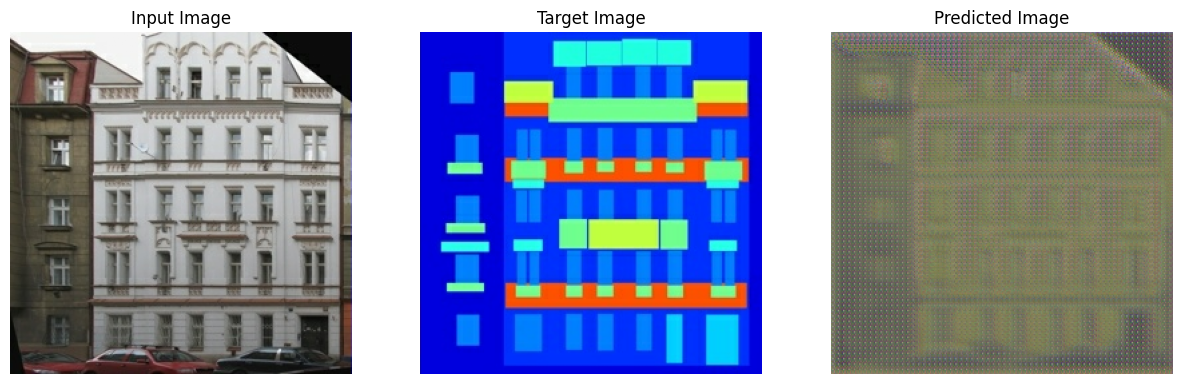

In [20]:
for example_input, example_target in test_dataset.take(1):
    generate_images(generator, example_input, example_target)


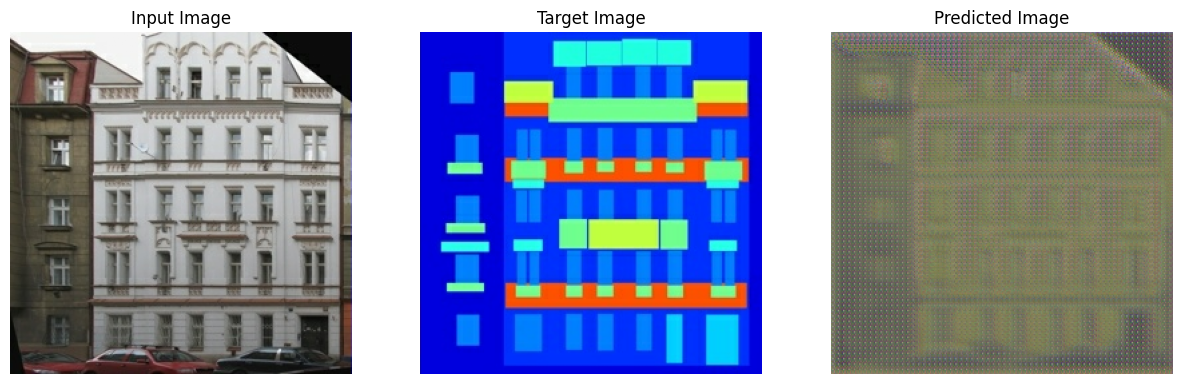

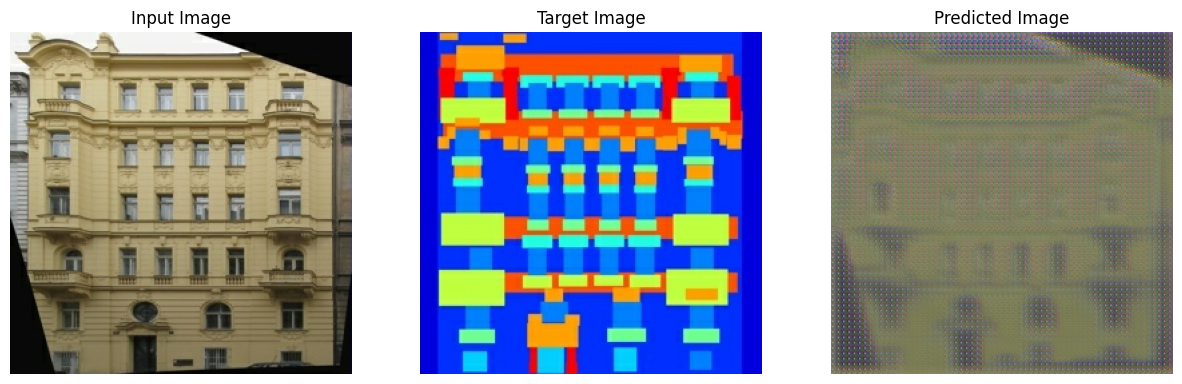

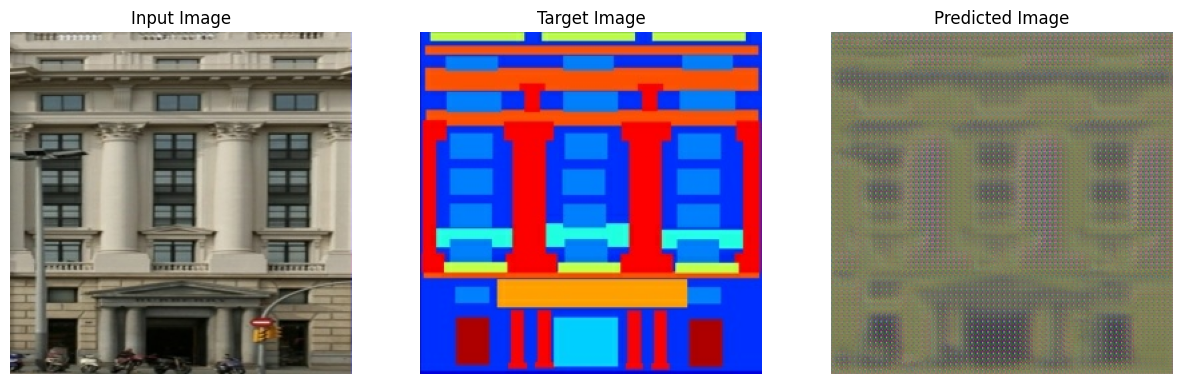

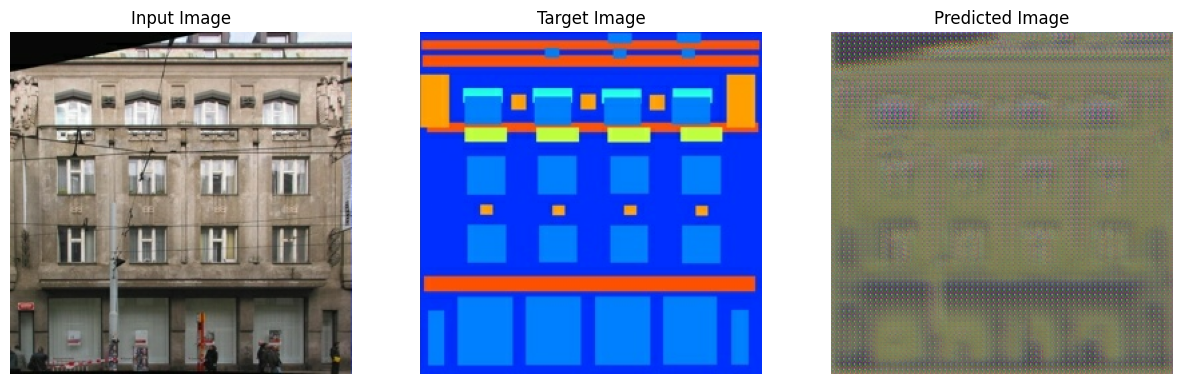

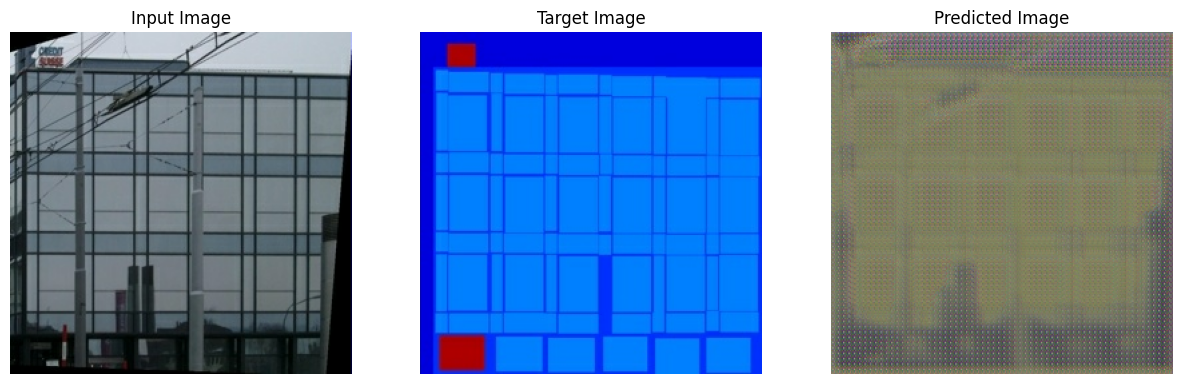

In [21]:
for example_input, example_target in test_dataset.take(5):  # Generates predictions for 5 images
    generate_images(generator, example_input, example_target)
